In [2]:
import calendar
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

plt.rcParams['figure.figsize'] = (16,9)

In [3]:
dataFrame = pd.read_csv('country vaccinations by manufacturer.csv')
locations = pd.unique(dataFrame['location'])

data = {}

for i in range(0, len(dataFrame)):
    location = dataFrame['location'][i]
    if not data.get(location):
        data[location] = dataFrame['total_vaccinations'][i]
    else:
        data[location] += dataFrame['total_vaccinations'][i]

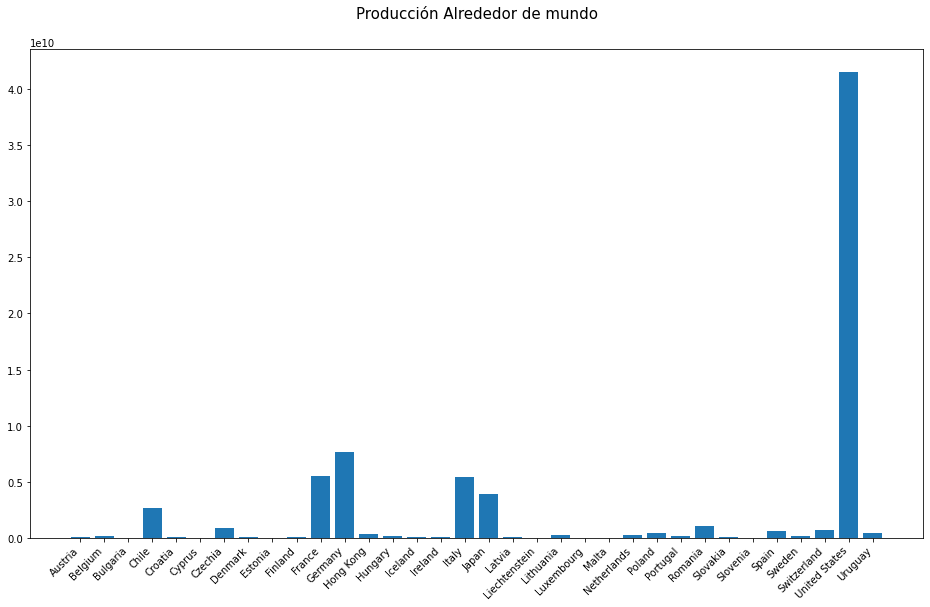

In [4]:
plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()), rotation=45, ha='right')
plt.title('Producción Alrededor del Mundo', y=1.05, size=15)
plt.show()


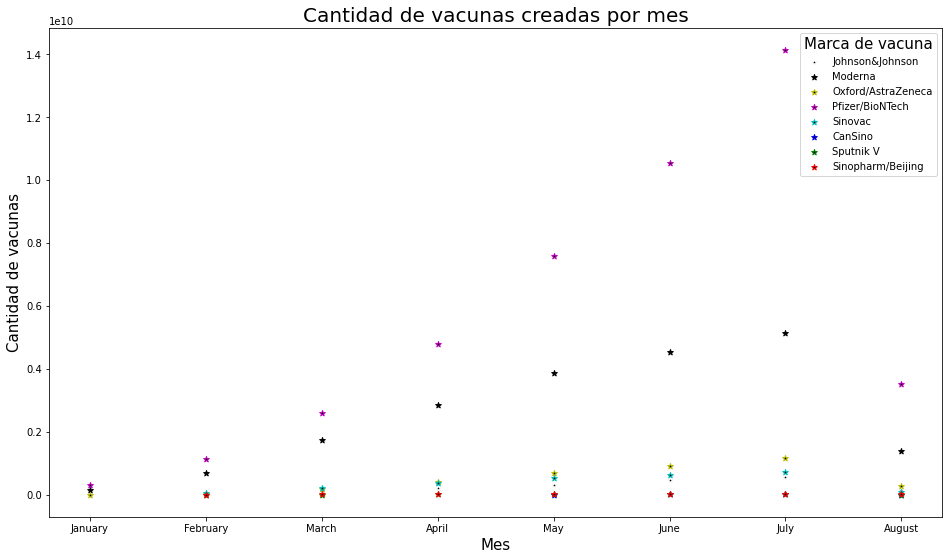

In [5]:

dates = {}

for i in range(0, len(dataFrame)):
    date = datetime.datetime.strptime(dataFrame['date'][i], '%Y-%m-%d')
    if date.year != 2021: continue
    month = str(calendar.month_name[date.month])
    vaccine = dataFrame['vaccine'][i]
    if not dates.get(vaccine):
        dates[vaccine] = {month: dataFrame['total_vaccinations'][i]}
    else:
        if not dates[vaccine].get(month):
            dates[vaccine][month] = dataFrame['total_vaccinations'][i]
        else:
            dates[vaccine][month] += dataFrame['total_vaccinations'][i]

colors = list('rgbcmykw')

for dict in dates.values():
    x = dict.keys()
    y = dict.values()
    plt.scatter(x, y, color=colors.pop(), marker='*', facecolor=(0,0,0))

plt.title('Cantidad de vacunas creadas por mes', fontsize=20)
plt.xlabel('Mes', fontsize=15)
plt.ylabel('Cantidad de vacunas', fontsize=15)
plt.legend(dates.keys(), loc='best', title='Marca de vacuna', title_fontsize=15)
plt.show()